In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files


In [15]:
df = pd.read_csv('/content/E-commerce Dataset.csv')
df.head()

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card
2,2018-11-08,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card
3,2018-04-18,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card
4,2018-08-13,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card


In [3]:
df.shape

(51290, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order_Date           51290 non-null  object 
 1   Time                 51290 non-null  object 
 2   Aging                51289 non-null  float64
 3   Customer_Id          51290 non-null  int64  
 4   Gender               51290 non-null  object 
 5   Device_Type          51290 non-null  object 
 6   Customer_Login_type  51290 non-null  object 
 7   Product_Category     51290 non-null  object 
 8   Product              51290 non-null  object 
 9   Sales                51289 non-null  float64
 10  Quantity             51288 non-null  float64
 11  Discount             51289 non-null  float64
 12  Profit               51290 non-null  float64
 13  Shipping_Cost        51289 non-null  float64
 14  Order_Priority       51288 non-null  object 
 15  Payment_method       51290 non-null 

# **Data Cleaning**

In [16]:
# handle Missing values
df['Sales'].fillna(df['Sales'].median(), inplace=True)
df['Quantity'].fillna(1, inplace=True)
df['Discount'].fillna(0, inplace=True)
df['Shipping_Cost'].fillna(df['Shipping_Cost'].median(), inplace=True)
df['Order_Priority'].fillna(df['Order_Priority'].mode()[0], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order_Date           51290 non-null  object 
 1   Time                 51290 non-null  object 
 2   Aging                51289 non-null  float64
 3   Customer_Id          51290 non-null  int64  
 4   Gender               51290 non-null  object 
 5   Device_Type          51290 non-null  object 
 6   Customer_Login_type  51290 non-null  object 
 7   Product_Category     51290 non-null  object 
 8   Product              51290 non-null  object 
 9   Sales                51290 non-null  float64
 10  Quantity             51290 non-null  float64
 11  Discount             51290 non-null  float64
 12  Profit               51290 non-null  float64
 13  Shipping_Cost        51290 non-null  float64
 14  Order_Priority       51290 non-null  object 
 15  Payment_method       51290 non-null 

/tmp/ipython-input-520414744.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sales'].fillna(df['Sales'].median(), inplace=True)
/tmp/ipython-input-520414744.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

# **Feature Engineering**

In [17]:
# Convert dates
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

# Fix Time column
df['Time'] = df['Time'].str.strip()
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.time
df['Time'] = df['Time'].fillna(pd.to_datetime("12:00:00").time())
df["Time"].head()

,Time
0,10:56:33
1,20:41:37
2,08:38:49
3,19:28:06
4,21:18:39


In [18]:
# Combine date+time
df['Order_Datetime'] = pd.to_datetime(df['Order_Date'].astype(str) + " " + df['Time'].astype(str))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Order_Date           51290 non-null  datetime64[ns]
 1   Time                 51290 non-null  object        
 2   Aging                51289 non-null  float64       
 3   Customer_Id          51290 non-null  int64         
 4   Gender               51290 non-null  object        
 5   Device_Type          51290 non-null  object        
 6   Customer_Login_type  51290 non-null  object        
 7   Product_Category     51290 non-null  object        
 8   Product              51290 non-null  object        
 9   Sales                51290 non-null  float64       
 10  Quantity             51290 non-null  float64       
 11  Discount             51290 non-null  float64       
 12  Profit               51290 non-null  float64       
 13  Shipping_Cost        51290 non-

In [19]:
ref_date = df['Order_Date'].max()
threshold_days = 180
# generate churn column
cust_last = df.groupby('Customer_Id')['Order_Date'].max().reset_index()
cust_last['days_since_last'] = (ref_date - cust_last['Order_Date']).dt.days
cust_last['churn'] = (cust_last['days_since_last'] >= threshold_days).astype(int)

df = df.merge(cust_last[['Customer_Id','churn','days_since_last']], on='Customer_Id', how='left')
df.head()

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method,Order_Datetime,churn,days_since_last
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card,2018-01-02 10:56:33,1,362
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card,2018-07-24 20:41:37,0,159
2,2018-11-08,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card,2018-11-08 08:38:49,0,52
3,2018-04-18,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card,2018-04-18 19:28:06,1,256
4,2018-08-13,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card,2018-08-13 21:18:39,0,139


**The customer who did not place order since last 180 days are consisdered churned.**

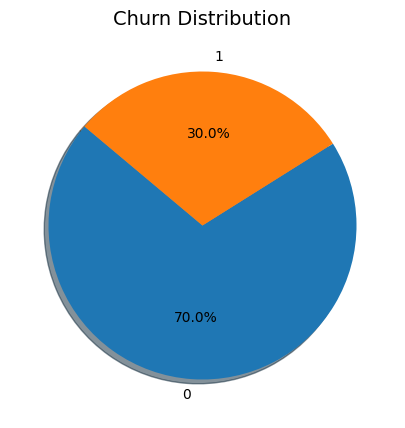

In [20]:
plt.figure(figsize=(6,5))
churn_counts = df['churn'].value_counts()
labels = churn_counts.index.astype(str)

plt.pie(
    churn_counts,
    labels=labels,
    autopct='%1.1f%%',
    shadow=True,
    startangle=140
)

plt.title("Churn Distribution", fontsize=14)
plt.show()

**Majority of customers are non-churners.**

**The data is imbalanced, which supports our decision to use SMOTE.**

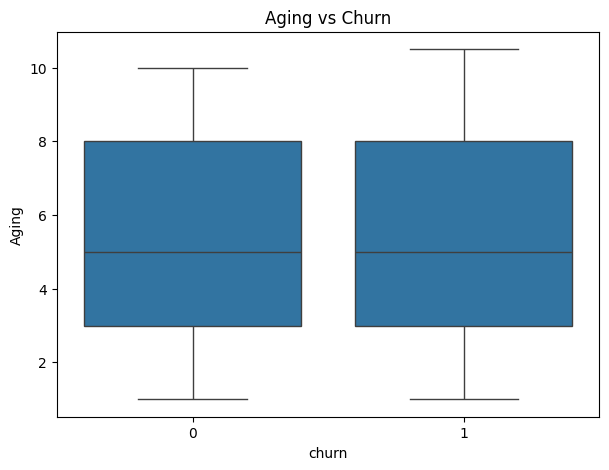

In [21]:


plt.figure(figsize=(7,5))
sns.boxplot(x='churn', y='Aging', data=df)
plt.title("Aging vs Churn")
plt.show()



**The boxes in above plot look almost same mean aging donot have much effect on churn here.**


In [22]:
df = df.sort_values(['Customer_Id','Order_Datetime'])

df['order_hour'] = df['Order_Datetime'].dt.hour
df['order_weekday'] = df['Order_Datetime'].dt.weekday
df['is_weekend'] = df['order_weekday'].isin([5,6]).astype(int)
df.head()

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,...,Profit,Shipping_Cost,Order_Priority,Payment_method,Order_Datetime,churn,days_since_last,order_hour,order_weekday,is_weekend
22079,2018-11-13,21:51:53,6.0,10000,Male,Web,Member,Fashion,Sneakers,62.0,...,20.7,2.1,Low,credit_card,2018-11-13 21:51:53,0,24,21,1,0
4274,2018-12-06,19:25:41,1.0,10000,Male,Web,Member,Auto & Accessories,Car Pillow & Neck Rest,231.0,...,146.4,14.6,Critical,credit_card,2018-12-06 19:25:41,0,24,19,3,0
17993,2018-08-20,22:26:30,10.0,10002,Male,Web,Member,Electronic,Fans,149.0,...,66.0,6.6,Critical,credit_card,2018-08-20 22:26:30,0,132,22,0,0
14911,2018-08-08,21:56:53,7.0,10004,Male,Web,Guest,Fashion,Sports Wear,85.0,...,1.6,0.2,Medium,credit_card,2018-08-08 21:56:53,0,144,21,2,0
20407,2018-06-14,00:09:22,5.0,10006,Male,Web,Member,Electronic,Samsung Mobile,220.0,...,131.2,13.1,Medium,credit_card,2018-06-14 00:09:22,0,144,0,3,0


**'order_hour'= at which hour of day customer place order.**

**'order_weekday' = at which day of week customer place order.**

**'is_weekend' = is customer place order on weekend or not.**

In [23]:
# Recency, Frequency, Monetary
first_purchase = df.groupby('Customer_Id')['Order_Datetime'].min().rename('first_purchase')
last_purchase = df.groupby('Customer_Id')['Order_Datetime'].max().rename('last_purchase')
recency_days = (df['Order_Datetime'].max() - last_purchase).dt.days.rename('recency_days')
frequency = df.groupby('Customer_Id')['Order_Datetime'].count().rename('frequency')
monetary = df.groupby('Customer_Id')['Sales'].sum().rename('monetary')
avg_order_value = (monetary / frequency).rename('avg_order_value')
total_quantity = df.groupby('Customer_Id')['Quantity'].sum().rename('total_quantity')
customer_lifetime = (last_purchase - first_purchase).dt.days.rename('customer_lifetime')
customer_lifetime = customer_lifetime.replace(0,1)


**first_purchase = date on which customer place his/her first order.**

**last_purchase = date on which customer place his/her last order.**

**recency_days = days since last purchase.**

**frequency = no of order each customer place.**

**monetary = total amount each customer spent.**

**avg_order_value = average  amount each cutomer spent.**

**total_quantity = total no of items each customer purchase.**

**customer_lifetime = how many no of days each customer stays.**

In [24]:
df = df.sort_values(['Customer_Id','Order_Datetime'])

df['prev_order'] = df.groupby('Customer_Id')['Order_Datetime'].shift(1)

# fractional days instead of .dt.days
df['interpurchase_days'] = (
    (df['Order_Datetime'] - df['prev_order']).dt.total_seconds() / 86400
).round(2)

# single purchase should be NaN, not 0
df['interpurchase_days'] = df['interpurchase_days'].fillna(np.nan)
df['interpurchase_days'].head(10)

,interpurchase_days
22079,NaN
4274,22.9
17993,NaN
14911,NaN
20407,NaN
19851,55.3
22697,NaN
23078,NaN
16656,NaN
737,NaN


In [25]:

interpurchase = df.groupby('Customer_Id')['interpurchase_days'].agg(
    mean_interpurchase_days=lambda x: x.mean(),
    std_interpurchase_days=lambda x: x.std(),
    max_gap=lambda x: x.max()
).round(2)


**'interpurchase_days' = no of gap days between customer current and prev order.**

**avg interpurchase= this avg interpurchase days of each customer similary std.**

**max_gap = max no of gap days for each customer.**

**The customer who purchase only once for them interpurchase days are Nan for now.**

In [26]:
purchase_rate_per_day = (frequency / customer_lifetime).rename('purchase_rate_per_day')
purchase_rate_per_day = purchase_rate_per_day.round(2)


In [27]:
pct_orders_with_discount = df.groupby('Customer_Id').apply(lambda x: (x['Discount']>0).mean()).rename('pct_orders_with_discount')


/tmp/ipython-input-1400959112.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pct_orders_with_discount = df.groupby('Customer_Id').apply(lambda x: (x['Discount']>0).mean()).rename('pct_orders_with_discount')


**pct_orders_with_discount to identify is cutomer only order with discount or not.**



In [30]:
prod_diversity = df.groupby('Customer_Id')['Product_Category'].nunique().rename('prod_diversity')
fav_category = df.groupby('Customer_Id')['Product_Category'].agg(lambda x: x.mode()[0]).rename('fav_category')

**prod_diversity = no of different item each customer buys.**

**fav_category = item customer most purchase.**

In [29]:
preferred_hour = df.groupby('Customer_Id')['order_hour'].agg(lambda x: x.mode()[0]).rename('preferred_hour')
pct_weekend_orders = df.groupby('Customer_Id')['is_weekend'].mean().rename('pct_weekend_orders')

**preferred_hour = at which hour of day customer mostly place order.**

**pct_weekend_orders = percentage of order a customer place on weekend.**

In [31]:
avg_shipping_cost = df.groupby('Customer_Id')['Shipping_Cost'].mean().rename('avg_shipping_cost')


**avg shipping cost = high shipping cost may cause customer lose.**

In [32]:
window = 30

# Filter orders in the last 30 days
recent_orders = df[df['Order_Date'] >= (ref_date - pd.Timedelta(days=window))]

# Count orders per customer
cust_30_orders = recent_orders.groupby('Customer_Id')['Order_Datetime'].nunique().reset_index(name='orders_30d')
cust_30_orders

,Customer_Id,orders_30d
0,10000,1
1,10027,1
2,10038,1
3,10073,1
4,10114,1
...,...,...
5075,99886,1
5076,99927,1
5077,99954,1
5078,99961,1


**no of order each customer placed in last 30 days.**

**Captures recent activity of the customer.**

**Customers with zero or very low recent orders are more likely to churn.**

In [33]:
window = 30
recent_orders = df[df['Order_Date'] >= (ref_date - pd.Timedelta(days=window))]
# Calculate total spend per customer in last 30 days
cust_30_spend = recent_orders.groupby('Customer_Id')['Sales'].sum().reset_index(name='spend_30d')

**Total money spent by the customer in the last 30 days.**

**A sudden drop in spending can signal declining interest.**

In [34]:
window = 30

# Previous 30-day period
prev_period_start = ref_date - pd.Timedelta(days=2*window)
prev_period_end = ref_date - pd.Timedelta(days=window)

# Filter orders in the previous 30-day period
prev_30_orders = df[(df['Order_Date'] >= prev_period_start) & (df['Order_Date'] < prev_period_end)]
cust_prev_30_orders = prev_30_orders.groupby('Customer_Id')['Order_Datetime'].nunique().reset_index(name='prev_30_orders')
cust_prev_30_spend = prev_30_orders.groupby('Customer_Id')['Sales'].nunique().reset_index(name='prev_30_spend')


**Number of orders and amount spend in 2nd last month.**

**If previous 30-day orders/spend > recent 30-day orders/spend, the customer is slowing down, a potential churn signal.**

In [35]:
# Sort orders and keep last 2 per customer
last2 = (
    df.sort_values(['Customer_Id', 'Order_Datetime'])
      .groupby('Customer_Id')['Order_Datetime']
      .agg(list)
)


def compute_gap(lst):
    if len(lst) < 2:
        return np.nan
    return (lst[-1] - lst[-2]).days


last2 = last2.apply(compute_gap).to_frame(name='recent_gap_days')
last2 = last2.set_index(last2.index)


**Helps to find interpurchase gap for each customer for 2nd last.**

**helps to find the trend that is interpurchase days are increasing are decreasing.**


In [36]:

cust_churn = cust_last.set_index('Customer_Id')['churn']
cust_30_orders = cust_30_orders.set_index('Customer_Id')
cust_30_spend = cust_30_spend.set_index('Customer_Id')
cust_prev_30_orders = cust_prev_30_orders.set_index('Customer_Id')
cust_prev_30_spend = cust_prev_30_spend.set_index('Customer_Id')


customer_features = pd.concat([
    recency_days,
    frequency,
    monetary,
    avg_order_value,
    total_quantity,
    first_purchase,
    last_purchase,
    customer_lifetime,
    purchase_rate_per_day,
    interpurchase,
    pct_orders_with_discount,
    prod_diversity,
    fav_category,
    preferred_hour,
    pct_weekend_orders,
    avg_shipping_cost,
    cust_30_orders,
    cust_30_spend,
    cust_prev_30_orders,
    cust_prev_30_spend,
    last2,
    cust_churn
], axis=1)

# Reset index to bring Customer_Id back as column
customer_features = customer_features.reset_index()
customer_features.head()


,Customer_Id,recency_days,frequency,monetary,avg_order_value,total_quantity,first_purchase,last_purchase,customer_lifetime,purchase_rate_per_day,...,fav_category,preferred_hour,pct_weekend_orders,avg_shipping_cost,orders_30d,spend_30d,prev_30_orders,prev_30_spend,recent_gap_days,churn
0,10000,24,2,293.0,146.5,2.0,2018-11-13 21:51:53,2018-12-06 19:25:41,22,0.09,...,Auto & Accessories,19,0.0,8.35,1.0,231.0,1.0,1.0,22.0,0
1,10002,132,1,149.0,149.0,2.0,2018-08-20 22:26:30,2018-08-20 22:26:30,1,1.00,...,Electronic,22,0.0,6.60,NaN,NaN,NaN,NaN,NaN,0
2,10004,144,1,85.0,85.0,4.0,2018-08-08 21:56:53,2018-08-08 21:56:53,1,1.00,...,Fashion,21,0.0,0.20,NaN,NaN,NaN,NaN,NaN,0
3,10006,144,2,440.0,220.0,3.0,2018-06-14 00:09:22,2018-08-08 07:25:41,55,0.04,...,Electronic,0,0.0,13.45,NaN,NaN,NaN,NaN,55.0,0
4,10013,227,1,159.0,159.0,1.0,2018-05-17 18:30:32,2018-05-17 18:30:32,1,1.00,...,Fashion,18,0.0,7.40,NaN,NaN,NaN,NaN,NaN,1


In [37]:
customer_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38997 entries, 0 to 38996
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Customer_Id               38997 non-null  int64         
 1   recency_days              38997 non-null  int64         
 2   frequency                 38997 non-null  int64         
 3   monetary                  38997 non-null  float64       
 4   avg_order_value           38997 non-null  float64       
 5   total_quantity            38997 non-null  float64       
 6   first_purchase            38997 non-null  datetime64[ns]
 7   last_purchase             38997 non-null  datetime64[ns]
 8   customer_lifetime         38997 non-null  int64         
 9   purchase_rate_per_day     38997 non-null  float64       
 10  mean_interpurchase_days   10166 non-null  float64       
 11  std_interpurchase_days    1844 non-null   float64       
 12  max_gap           

In [38]:
# Replace NaN with 0 because these are customers who didnt place any order in last 30 days
customer_features['orders_30d'] = customer_features['orders_30d'].fillna(0)
customer_features['spend_30d'] = customer_features['spend_30d'].fillna(0)
customer_features['prev_30_orders'] = customer_features['prev_30_orders'].fillna(0)
customer_features['prev_30_spend'] = customer_features['prev_30_spend'].fillna(0)


In [39]:
#customer has no second order so their gap will be equal to their lifetime
customer_features['recent_gap_days'] = customer_features['recent_gap_days'].fillna(
    customer_features['customer_lifetime']
)


In [40]:
#customer has no second order so their gap will be equal to their lifetime
customer_features['mean_interpurchase_days'] = customer_features['mean_interpurchase_days'].fillna( customer_features['customer_lifetime'] )


In [41]:
# Orders trend
customer_features['orders_trend_30d'] = customer_features['orders_30d'] - customer_features['prev_30_orders']
# If negative means decline in orders
customer_features['orders_decline_flag'] = (customer_features['orders_trend_30d'] < 0).astype(int)


In [42]:
customer_features['spend_trend_30d'] = ( (customer_features['spend_30d'] / window) - (customer_features['prev_30_spend'] / window)).round(2)

customer_features['spend_decline_flag'] = (customer_features['spend_trend_30d'] < 0).astype(int)

**Features like decrease in order count, decrease in spending,**

**Captures negative trends.**

**Customers whose activity is dropping over time are more likely to churn.**

In [43]:
# Frequency trend over recent vs previous 30 days if 1 means decresing and 0 means incresing or stable
customer_features['freq_trend_30d'] = customer_features['orders_30d']/window - customer_features['prev_30_orders']/window
customer_features['freq_decline_flag'] = (customer_features['freq_trend_30d'] < 0).astype(int)
customer_features.head()

,Customer_Id,recency_days,frequency,monetary,avg_order_value,total_quantity,first_purchase,last_purchase,customer_lifetime,purchase_rate_per_day,...,prev_30_orders,prev_30_spend,recent_gap_days,churn,orders_trend_30d,orders_decline_flag,spend_trend_30d,spend_decline_flag,freq_trend_30d,freq_decline_flag
0,10000,24,2,293.0,146.5,2.0,2018-11-13 21:51:53,2018-12-06 19:25:41,22,0.09,...,1.0,1.0,22.0,0,0.0,0,7.67,0,0.0,0
1,10002,132,1,149.0,149.0,2.0,2018-08-20 22:26:30,2018-08-20 22:26:30,1,1.00,...,0.0,0.0,1.0,0,0.0,0,0.00,0,0.0,0
2,10004,144,1,85.0,85.0,4.0,2018-08-08 21:56:53,2018-08-08 21:56:53,1,1.00,...,0.0,0.0,1.0,0,0.0,0,0.00,0,0.0,0
3,10006,144,2,440.0,220.0,3.0,2018-06-14 00:09:22,2018-08-08 07:25:41,55,0.04,...,0.0,0.0,55.0,0,0.0,0,0.00,0,0.0,0
4,10013,227,1,159.0,159.0,1.0,2018-05-17 18:30:32,2018-05-17 18:30:32,1,1.00,...,0.0,0.0,1.0,1,0.0,0,0.00,0,0.0,0


In [44]:
customer_features['lifetime_freq_per_day'] = (customer_features['frequency'] / customer_features['customer_lifetime'] ).round(2)
window = 30
customer_features['recent_freq_per_day'] = ( customer_features['orders_30d'] / window ).round(2)
customer_features['freq_trend_long'] = ( customer_features['recent_freq_per_day'] - customer_features['lifetime_freq_per_day'] ).round(2)
customer_features['freq_decline_long_flag'] = ( customer_features['freq_trend_long'] < 0 ).astype(int)
customer_features.head()


,Customer_Id,recency_days,frequency,monetary,avg_order_value,total_quantity,first_purchase,last_purchase,customer_lifetime,purchase_rate_per_day,...,orders_trend_30d,orders_decline_flag,spend_trend_30d,spend_decline_flag,freq_trend_30d,freq_decline_flag,lifetime_freq_per_day,recent_freq_per_day,freq_trend_long,freq_decline_long_flag
0,10000,24,2,293.0,146.5,2.0,2018-11-13 21:51:53,2018-12-06 19:25:41,22,0.09,...,0.0,0,7.67,0,0.0,0,0.09,0.03,-0.06,1
1,10002,132,1,149.0,149.0,2.0,2018-08-20 22:26:30,2018-08-20 22:26:30,1,1.00,...,0.0,0,0.00,0,0.0,0,1.00,0.00,-1.00,1
2,10004,144,1,85.0,85.0,4.0,2018-08-08 21:56:53,2018-08-08 21:56:53,1,1.00,...,0.0,0,0.00,0,0.0,0,1.00,0.00,-1.00,1
3,10006,144,2,440.0,220.0,3.0,2018-06-14 00:09:22,2018-08-08 07:25:41,55,0.04,...,0.0,0,0.00,0,0.0,0,0.04,0.00,-0.04,1
4,10013,227,1,159.0,159.0,1.0,2018-05-17 18:30:32,2018-05-17 18:30:32,1,1.00,...,0.0,0,0.00,0,0.0,0,1.00,0.00,-1.00,1


**Change in frequency of orders over time.**

**Detects accelerating vs decelerating purchase behavior. If the trend is declining, it’s a strong churn indicator.**

In [45]:
customer_features['gap_trend'] = (customer_features['recent_gap_days'] - customer_features['mean_interpurchase_days'])

customer_features['gap_increase_flag'] = (customer_features['gap_trend'] > 0 ).astype(int)
customer_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38997 entries, 0 to 38996
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Customer_Id               38997 non-null  int64         
 1   recency_days              38997 non-null  int64         
 2   frequency                 38997 non-null  int64         
 3   monetary                  38997 non-null  float64       
 4   avg_order_value           38997 non-null  float64       
 5   total_quantity            38997 non-null  float64       
 6   first_purchase            38997 non-null  datetime64[ns]
 7   last_purchase             38997 non-null  datetime64[ns]
 8   customer_lifetime         38997 non-null  int64         
 9   purchase_rate_per_day     38997 non-null  float64       
 10  mean_interpurchase_days   38997 non-null  float64       
 11  std_interpurchase_days    1844 non-null   float64       
 12  max_gap           

**If gap days are increasing cutomer can be possiblely churned.**

In [46]:
customer_features["pct_orders_with_discount"].value_counts()

,count
pct_orders_with_discount,
1.0,38996
0.0,1


In [47]:

customer_features.to_csv("customer_features.csv", index=False)

In [48]:
files.download("customer_features.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**convert generated feature into a new df name as customer_features and download this df as csv to train model on it.**